### Problem Description  

Given an array of integers arr and an integer d. In one step you can jump from index i to index:  

i + x where: i + x < arr.length and 0 < x <= d.  
i - x where: i - x >= 0 and 0 < x <= d.  
In addition, you can only jump from index i to index j if arr[i] > arr[j] and arr[i] > arr[k] for all indices k between i and j (More formally min(i, j) < k < max(i, j)).  

You can choose any index of the array and start jumping. Return the maximum number of indices you can visit.  

Notice that you can not jump outside of the array at any time.  

>**Example 1:**  
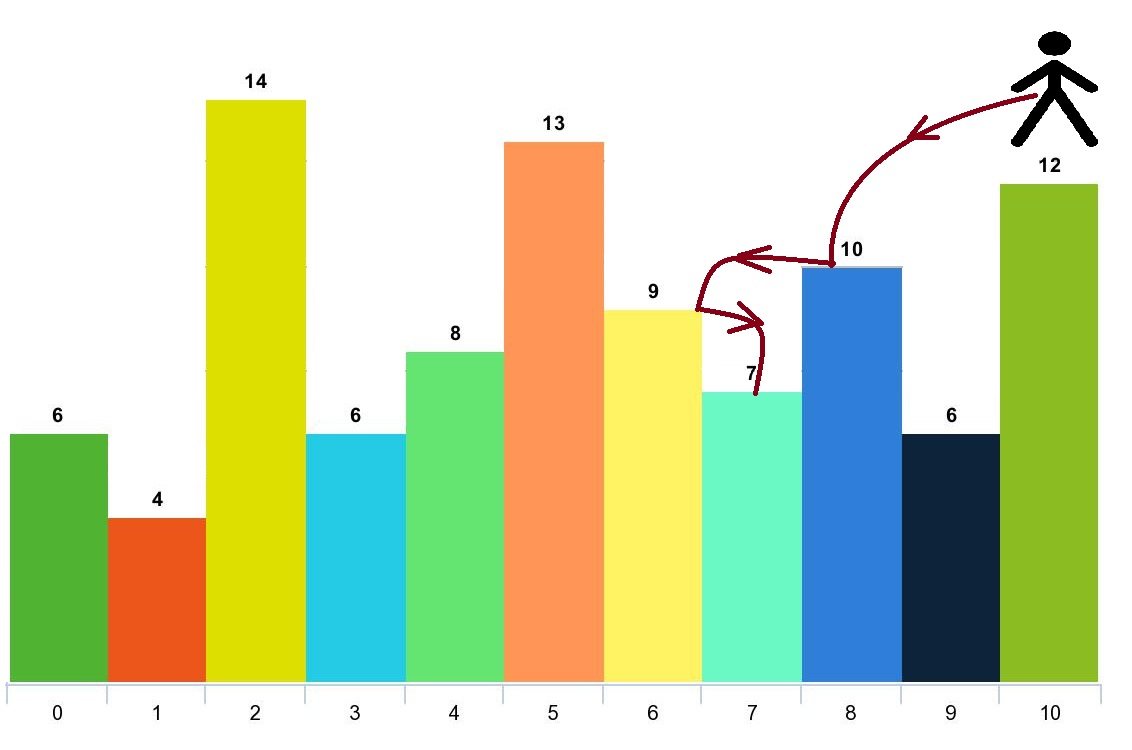  
Input: arr = [6,4,14,6,8,13,9,7,10,6,12], d = 2  
Output: 4  
Explanation: You can start at index 10. You can jump 10 --> 8 --> 6 --> 7 as shown.  
Note that if you start at index 6 you can only jump to index 7. You cannot jump to index 5 because 13 > 9. You cannot jump to index 4 because index 5 is between index 4 and 6 and 13 > 9.  
Similarly You cannot jump from index 3 to index 2 or index 1.  

>**Example 2:**  
Input: arr = [3,3,3,3,3], d = 3  
Output: 1  
Explanation: You can start at any index. You always cannot jump to any index.  

>**Example 3:**  
Input: arr = [7,6,5,4,3,2,1], d = 1  
Output: 7  
Explanation: Start at index 0. You can visit all the indicies.   
 

### Solution
We can use DP to solve this problem. What we store in dp array is the maximum step we can walk from this index, why we can solve this problem with dp is because the maximum step we can walk from index i is the maximum step of the index that I'm going to walk trough can walk +1.  
For example, if I walk to j from i, dp[i] = max(1+dp[j], dp[i])

In [1]:
class Solution:
    def maxJumps(self, arr: 'List[int]', d: 'int') -> 'int':
        dp = [0]*len(arr)
        for i in range(len(arr)):
            if dp[i]:
                continue
            else:
                self.find_step(i, arr, dp, d)
        return max(dp)
        
        
    def find_step(self, i, arr, dp, d):
        l = max(0, i-d)
        for j in range(l, i):
            if arr[j]>=arr[i]:
                l = j+1
        r = min(len(arr), i+d+1)
        for j in range(i+1, r):
            if arr[j]>=arr[i]:
                r = j
                break
        if r-l==1:
            dp[i] = 1
            return 
        for j in range(l, r):
            if j==i:
                continue
            if dp[j]:
                dp[i] = max(1+dp[j], dp[i])
            else:
                self.find_step(j, arr, dp, d)
                dp[i] = max(1+dp[j], dp[i])
        return

In [2]:
arr = [6,4,14,6,8,13,9,7,10,6,12]
d = 2

sol = Solution()
sol.maxJumps(arr, d)

4